## Constituency Parsing

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/constituency](https://github.com/huseinzol05/Malaya/tree/master/example/constituency).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

In [1]:
import logging

logging.basicConfig(level=logging.INFO)

In [2]:
%%time

import malaya

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


CPU times: user 5.73 s, sys: 1.12 s, total: 6.85 s
Wall time: 7.73 s


### what is constituency parsing

Assign a sentence into its own syntactic structure, defined by certain standardization. For example,

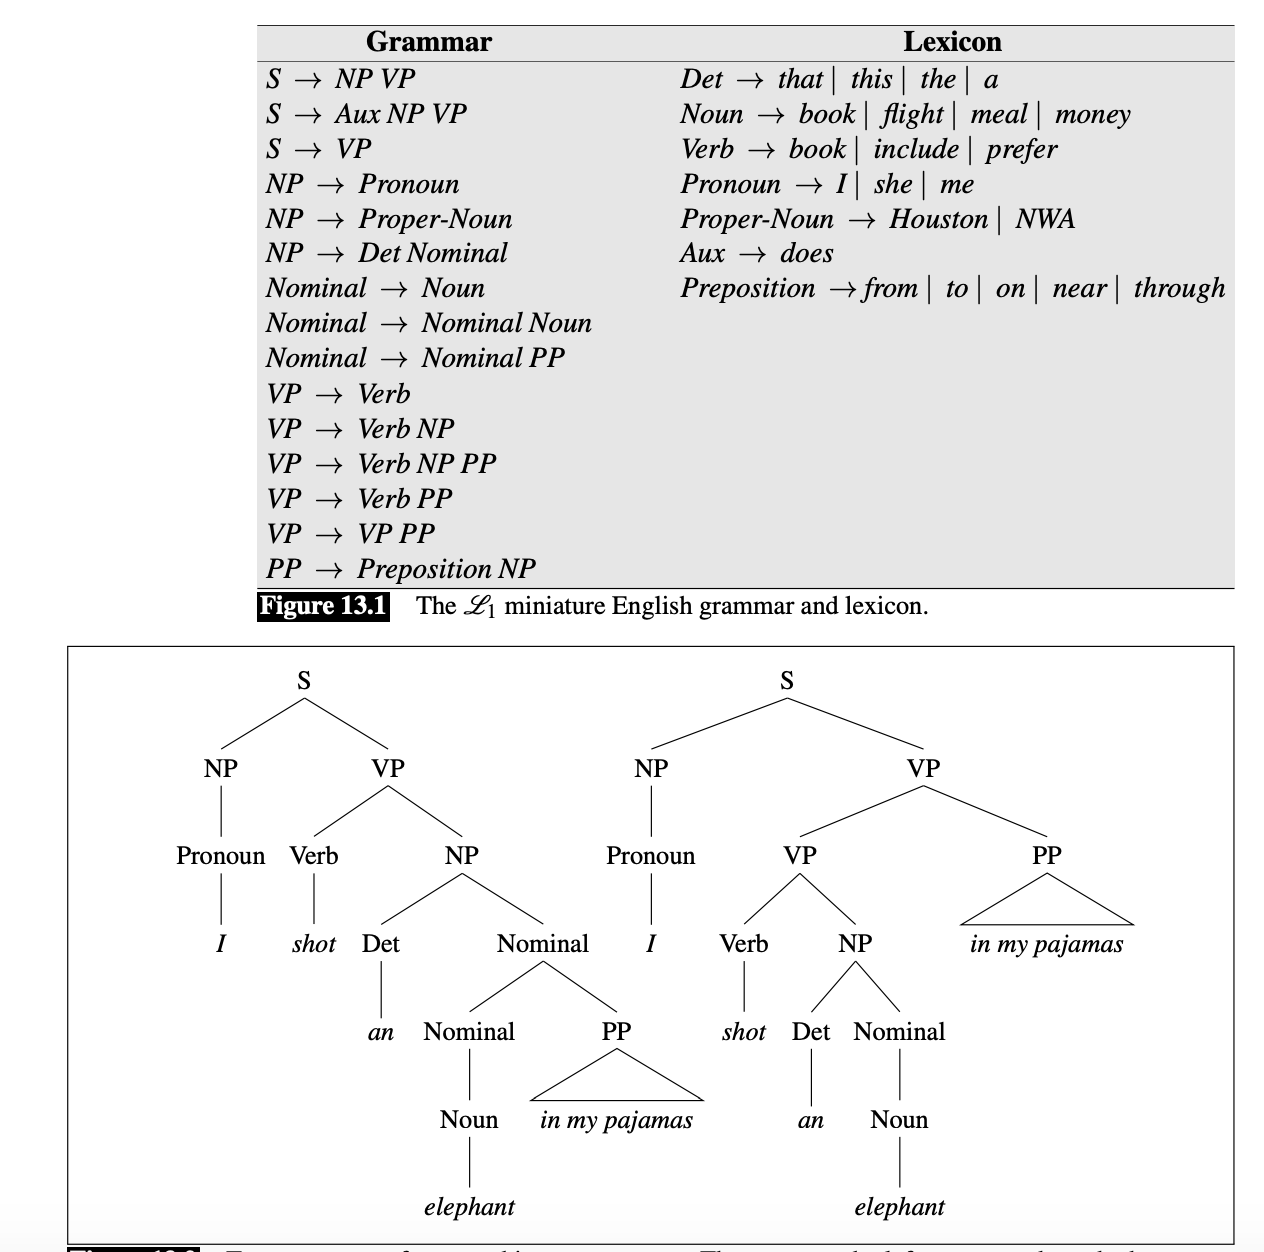

In [2]:
from IPython.core.display import Image, display

display(Image('constituency.png', width=500))

Read more at Stanford notes, https://web.stanford.edu/~jurafsky/slp3/13.pdf

The context free grammar totally depends on language, so for Bahasa, we follow https://github.com/famrashel/idn-treebank

### List available transformer Constituency models

In [3]:
malaya.constituency.available_transformer()

INFO:malaya.constituency:tested on test set at https://github.com/huseinzol05/malaya/blob/master/session/constituency/download-data.ipynb


Size (MB)  Quantized Size (MB)  Recall  Precision  FScore  \
bert             470.0                118.0   78.96      81.78   80.35   
tiny-bert        125.0                 31.8   74.89      78.79   76.79   
albert           180.0                 45.7   77.57      80.50   79.01   
tiny-albert       56.7                 14.5   67.21      74.89   70.84   
xlnet            498.0                126.0   81.52      85.18   83.31   

             CompleteMatch  TaggingAccuracy  
bert                 10.37            91.59  
tiny-bert             9.01            91.17  
albert                5.77            90.30  
tiny-albert           2.11            87.75  
xlnet                11.71            91.71

In [3]:
string = 'Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar sekiranya mengantuk ketika memandu.'

### Load xlnet constituency model

```python
def transformer(model: str = 'xlnet', quantized: bool = False, **kwargs):
    """
    Load Transformer Constituency Parsing model, transfer learning Transformer + self attentive parsing.

    Parameters
    ----------
    model : str, optional (default='bert')
        Model architecture supported. Allowed values:

        * ``'bert'`` - Google BERT BASE parameters.
        * ``'tiny-bert'`` - Google BERT TINY parameters.
        * ``'albert'`` - Google ALBERT BASE parameters.
        * ``'tiny-albert'`` - Google ALBERT TINY parameters.
        * ``'xlnet'`` - Google XLNET BASE parameters.
    
    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model. 
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result : malaya.model.tf.compat.v1.Constituency class
    """
```

In [5]:
model = malaya.constituency.transformer(model = 'xlnet')

### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [4]:
quantized_model = malaya.constituency.transformer(model = 'xlnet', quantized = True)

### Parse into NLTK Tree

Make sure you already installed `nltk`, if not, simply,

```bash
pip install nltk
```

We preferred to parse into NLTK tree, so we can play around with children / subtrees.

```python
def parse_nltk_tree(self, string: str):

    """
    Parse a string into NLTK Tree, to make it useful, make sure you already installed tktinker.

    Parameters
    ----------
    string : str

    Returns
    -------
    result: nltk.Tree object
    """
```

In [10]:
tree = model.parse_nltk_tree(string)

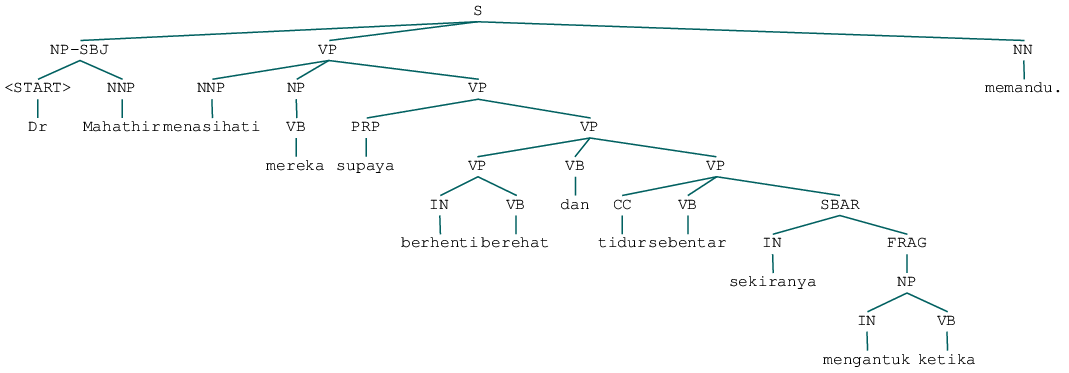

In [11]:
tree

In [5]:
tree = quantized_model.parse_nltk_tree(string)

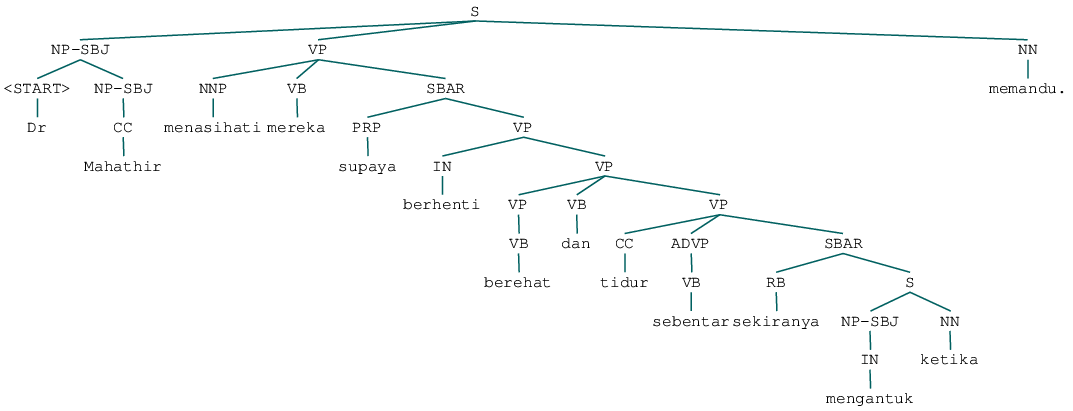

In [6]:
tree

### Parse into Tree

This is a simple Tree object defined at [malaya.text.trees](https://github.com/huseinzol05/Malaya/blob/master/malaya/text/trees.py).

```python
def parse_tree(self, string):

    """
    Parse a string into string treebank format.

    Parameters
    ----------
    string : str

    Returns
    -------
    result: malaya.text.trees.InternalTreebankNode class
    """
```

In [6]:
tree = model.parse_tree(string)

### Vectorize

Let say you want to visualize word level in lower dimension, you can use `model.vectorize`,

```python
def vectorize(self, string: str):
    """
    vectorize a string.

    Parameters
    ----------
    string: List[str]

    Returns
    -------
    result: np.array
    """
```

In [5]:
r = quantized_model.vectorize(string)

In [7]:
x = [i[0] for i in r]
y = [i[1] for i in r]

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE().fit_transform(y)
tsne.shape

(14, 2)

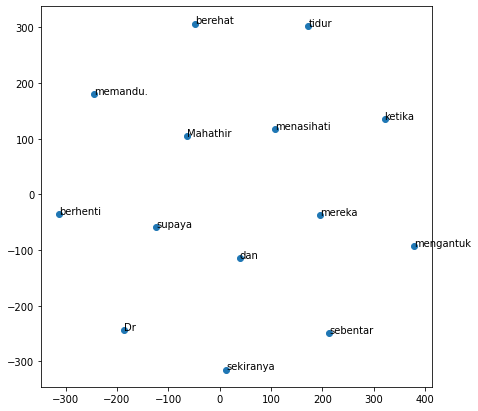

In [10]:
plt.figure(figsize = (7, 7))
plt.scatter(tsne[:, 0], tsne[:, 1])
labels = x
for label, x, y in zip(
    labels, tsne[:, 0], tsne[:, 1]
):
    label = (
        '%s, %.3f' % (label[0], label[1])
        if isinstance(label, list)
        else label
    )
    plt.annotate(
        label,
        xy = (x, y),
        xytext = (0, 0),
        textcoords = 'offset points',
    )